In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
class EventGenerator:
    def __init__(self, rate, start_time, stop_time, gti=None, periodic=None):
        arrival_times = []
        _t = start_time - (1/rate)*np.log(1-np.random.random())
        while _t < stop_time:
            arrival_times.append(_t)
            _t -= (1/rate)*np.log(1-np.random.random())
        self.times = np.array(arrival_times)
        

In [3]:
p = EventGenerator(20, 0, 139)
print(p.times)

[2.99083238e-02 8.62172996e-02 9.40948164e-02 ... 1.38868183e+02
 1.38962264e+02 1.38981368e+02]


<IPython.core.display.Javascript object>


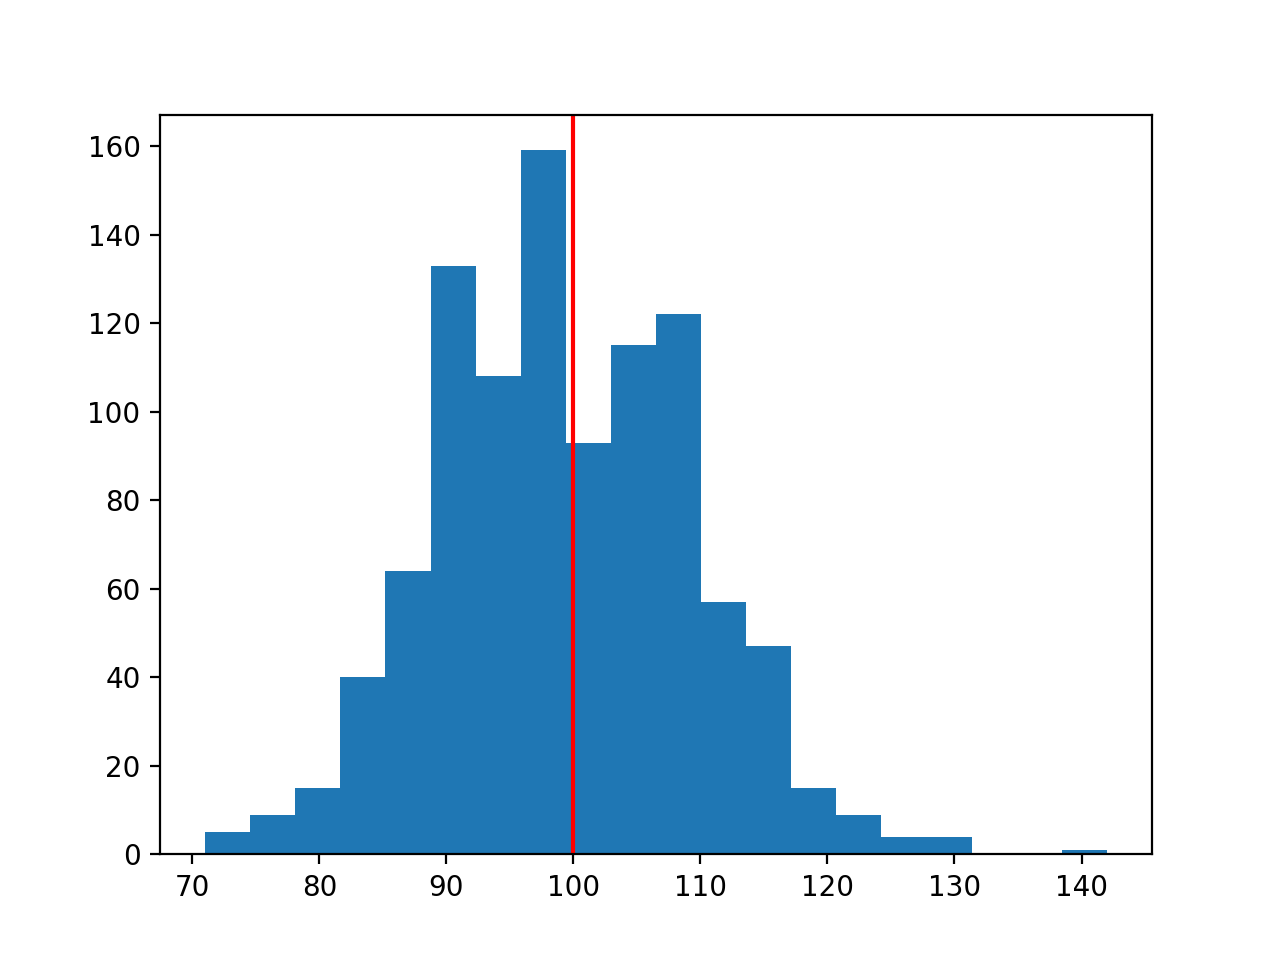

In [4]:
rate = 1
x = [len(EventGenerator(rate, 0, 100).times) for _x in range(1000)]
plt.hist(x, bins=20)
plt.axvline(rate*100, color='red')
plt.show()

<IPython.core.display.Javascript object>


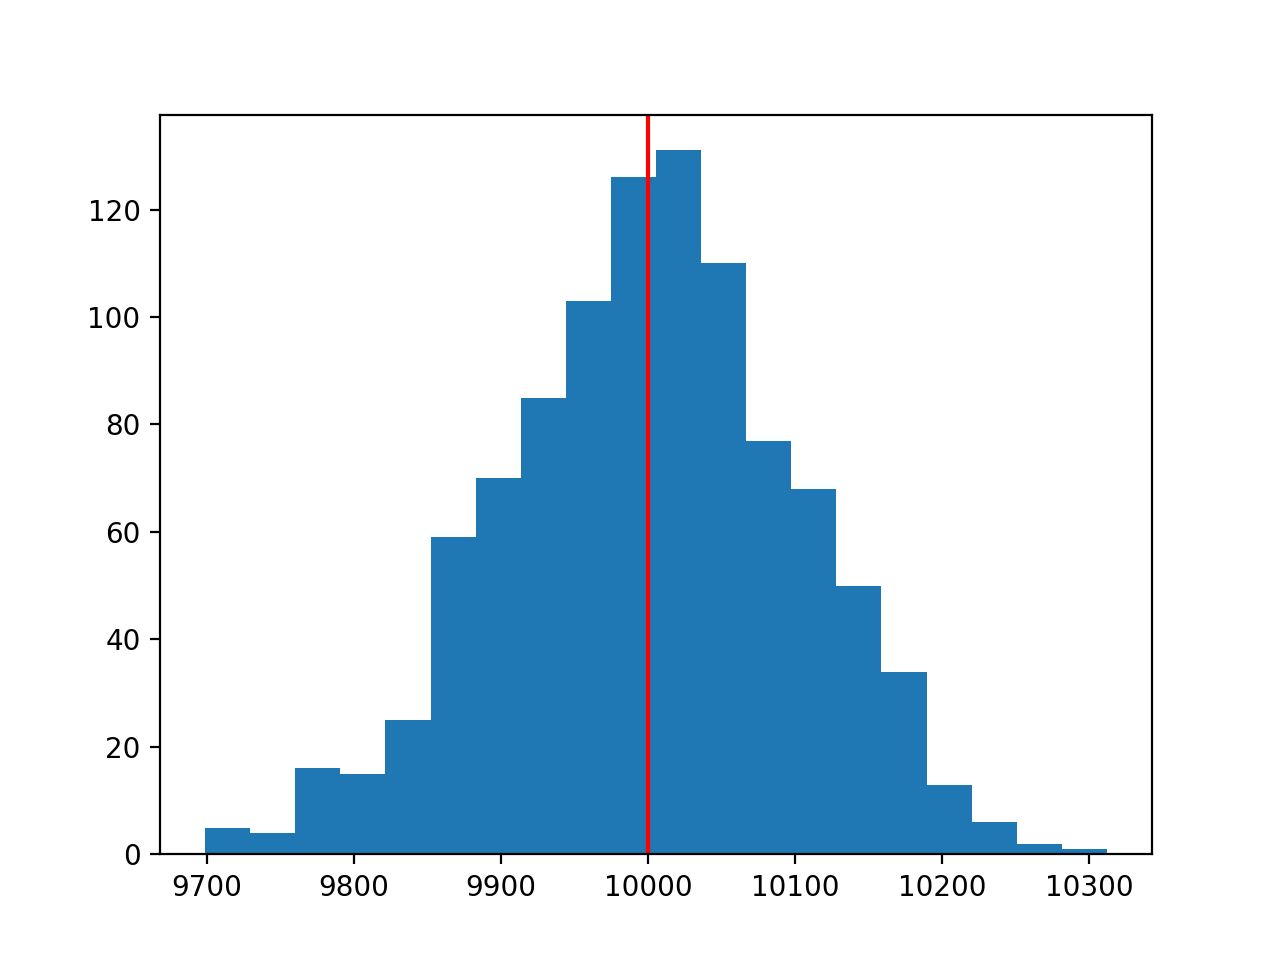

In [5]:
rate = 100
y = [len(EventGenerator(rate, 0, 100).times) for _x in range(1000)]
plt.hist(y, bins=20)
plt.axvline(rate*100, color='red')
plt.show()

In [6]:
len(EventGenerator(20, 0, 139).times)

2691

![alt text](sin_3.png)

![alt text](sin_2.png)

In [7]:
def sin_shape(x, pf, period=2*np.pi, phase=0.0):
    return 1-0.5*pf+0.5*pf*np.sin(x*2*np.pi/period+phase*2*np.pi)

In [8]:
pulse_fractions = np.arange(11)/10
x = np.linspace(0, 20, 1000)
sins = []
for pf in pulse_fractions:
    sins.append(sin_shape(x, pf, 5))

<IPython.core.display.Javascript object>


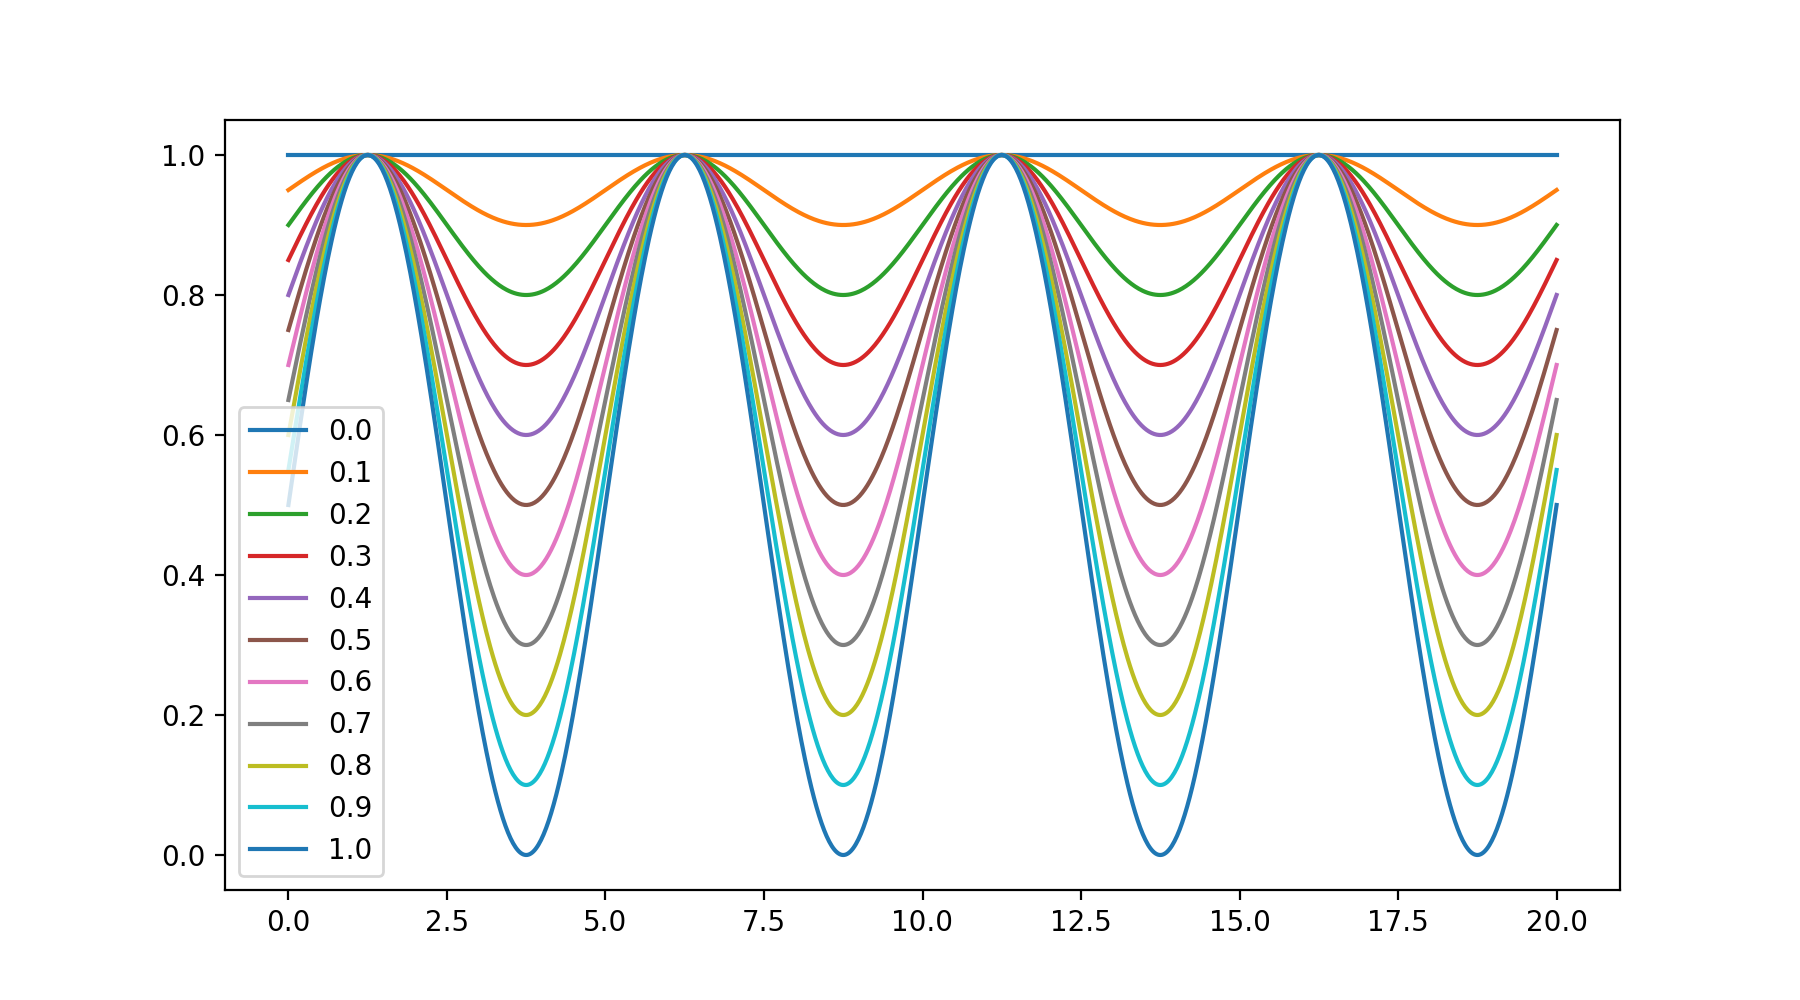

In [10]:
fig, ax = plt.subplots(figsize=(9,5))
for i, s in enumerate(sins):
    ax.plot(x, s, label=str(pulse_fractions[i]))
# ax.axvline(5)
ax.legend()
plt.show()

In [11]:
class PeriodicEventGenerator:
    def __init__(self, rate, start_time, stop_time, period=2*np.pi, pf=1.0, phase=0.0):
        self.period = period
        self.pf = pf
        self.phase = phase
        rate = rate*(1+pf)
        arrival_times = []
        _t = start_time - (1/rate)*np.log(1-np.random.random())
        while _t < stop_time:
            if np.random.random() < self.sin_shape(_t, pf, period, phase):
                arrival_times.append(_t)
            _t -= (1/rate)*np.log(1-np.random.random())
        self.times = np.array(arrival_times)
        
    def sin_shape(self, x, pf, period=2*np.pi, phase=0.0):
        return 1-0.5*pf+0.5*pf*np.sin(x*2*np.pi/period+phase*2*np.pi) 
    
class PeriodicEventGenerator1:
    def __init__(self, rate, start_time, stop_time, period=2*np.pi, pf=1.0, phase=0.0):
        self.period = period
        self.pf = pf
        self.phase = phase
#         rate = rate*(1+pf)
        arrival_times = []
        _t = start_time - (1/rate)*np.log(1-np.random.random())
        while _t < stop_time:
            if np.random.random() < self.sin_shape(_t, pf, period, phase):
                arrival_times.append(_t)
            _t -= (1/rate)*np.log(1-np.random.random())
        self.times = np.array(arrival_times)
        
    def sin_shape(self, x, pf, period=2*np.pi, phase=0.0):
        return 1-0.5*pf+0.5*pf*np.sin(x*2*np.pi/period+phase*2*np.pi) 

In [15]:
events = PeriodicEventGenerator(20, 10, 10+42*5, period=42, pf=0.8)

<IPython.core.display.Javascript object>


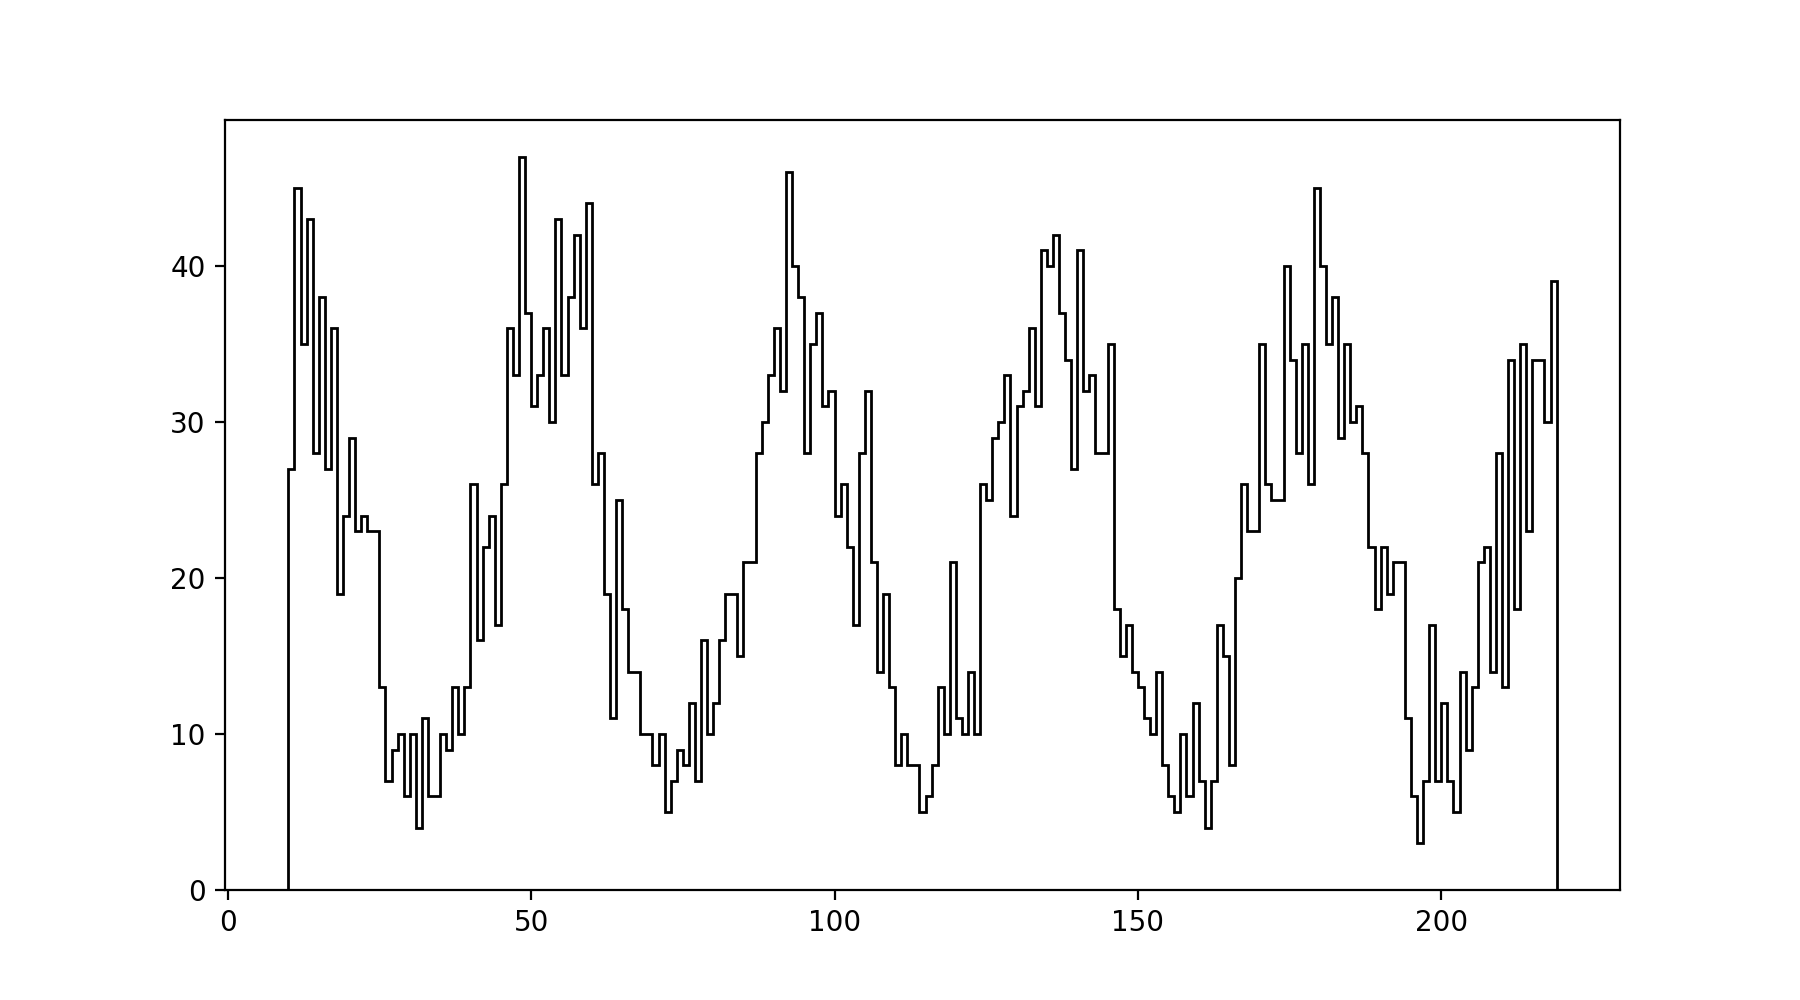

In [16]:
bins = np.arange(10, 10+42*5, 1)
fig, ax = plt.subplots(figsize=(9,5))

ax.hist(events.times, bins=bins, histtype='step' ,color='k', label='rate')

plt.show()

<IPython.core.display.Javascript object>


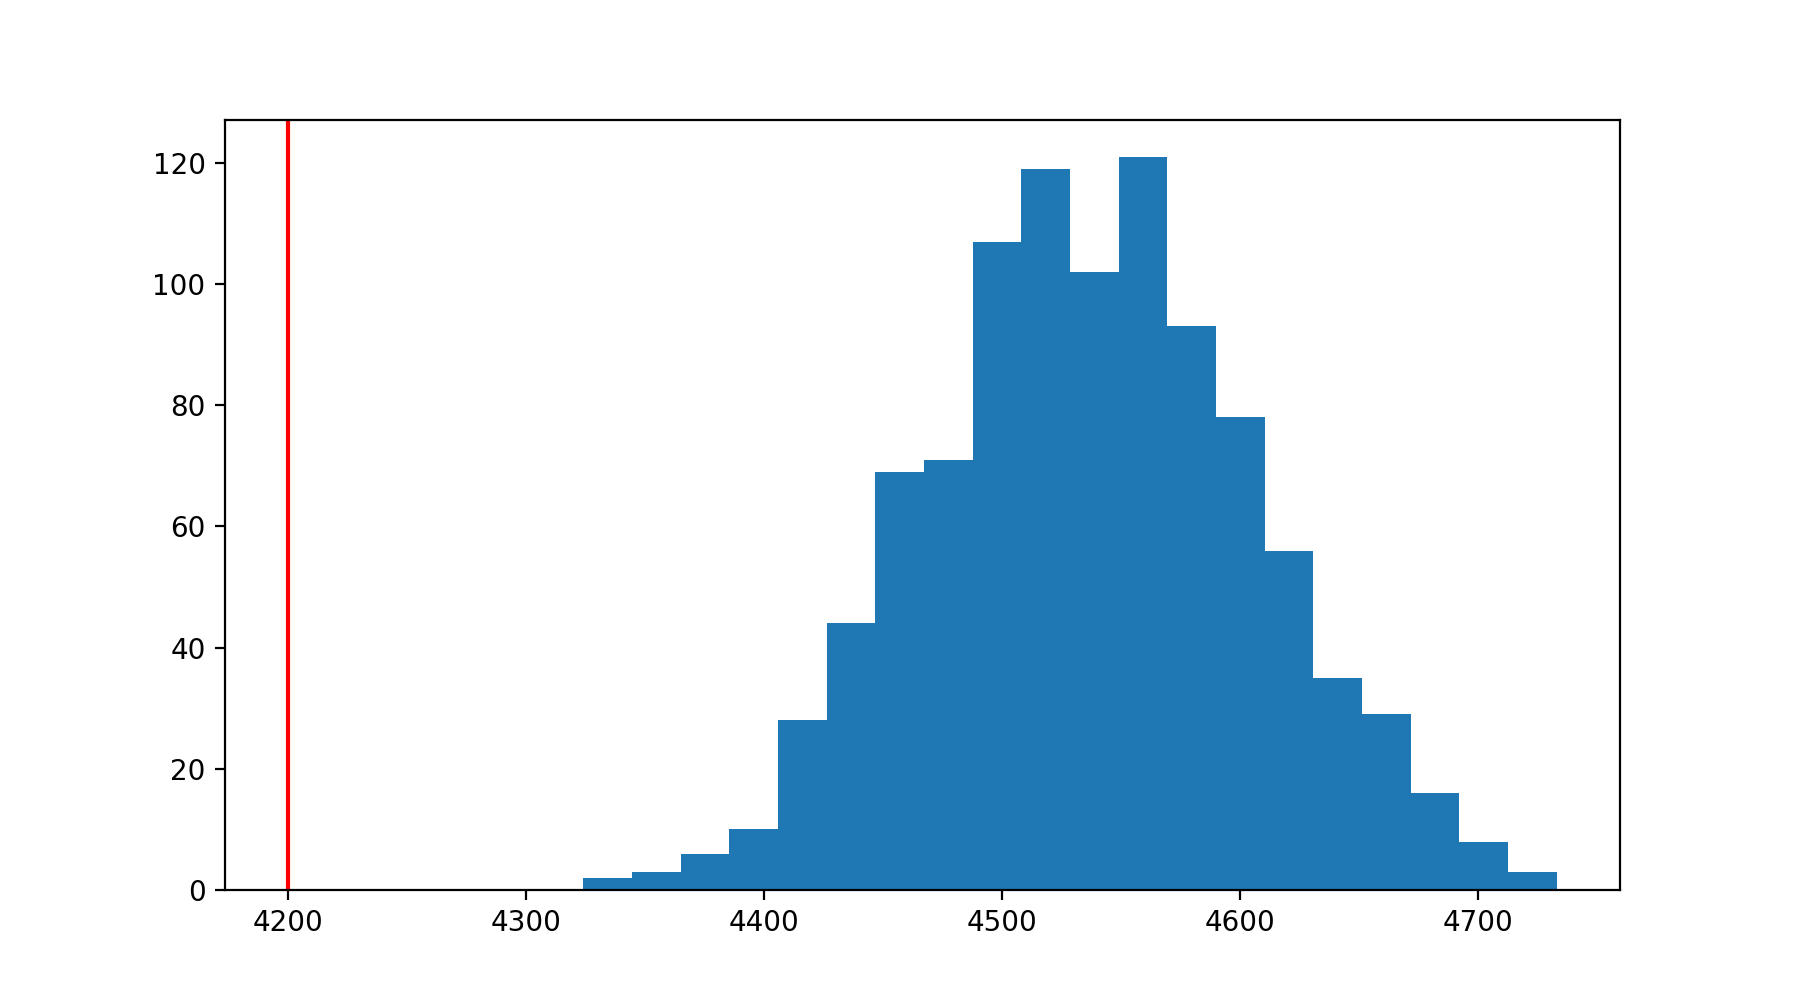

In [18]:
rate = 20
z = [len(PeriodicEventGenerator(20, 10, 10+42*5, period=42, pf=0.8).times) for _x in range(1000)]
fig, ax = plt.subplots(figsize=(9,5))
ax.hist(z, bins=20)
ax.axvline(rate*42*5, color='red')
plt.show()

<IPython.core.display.Javascript object>


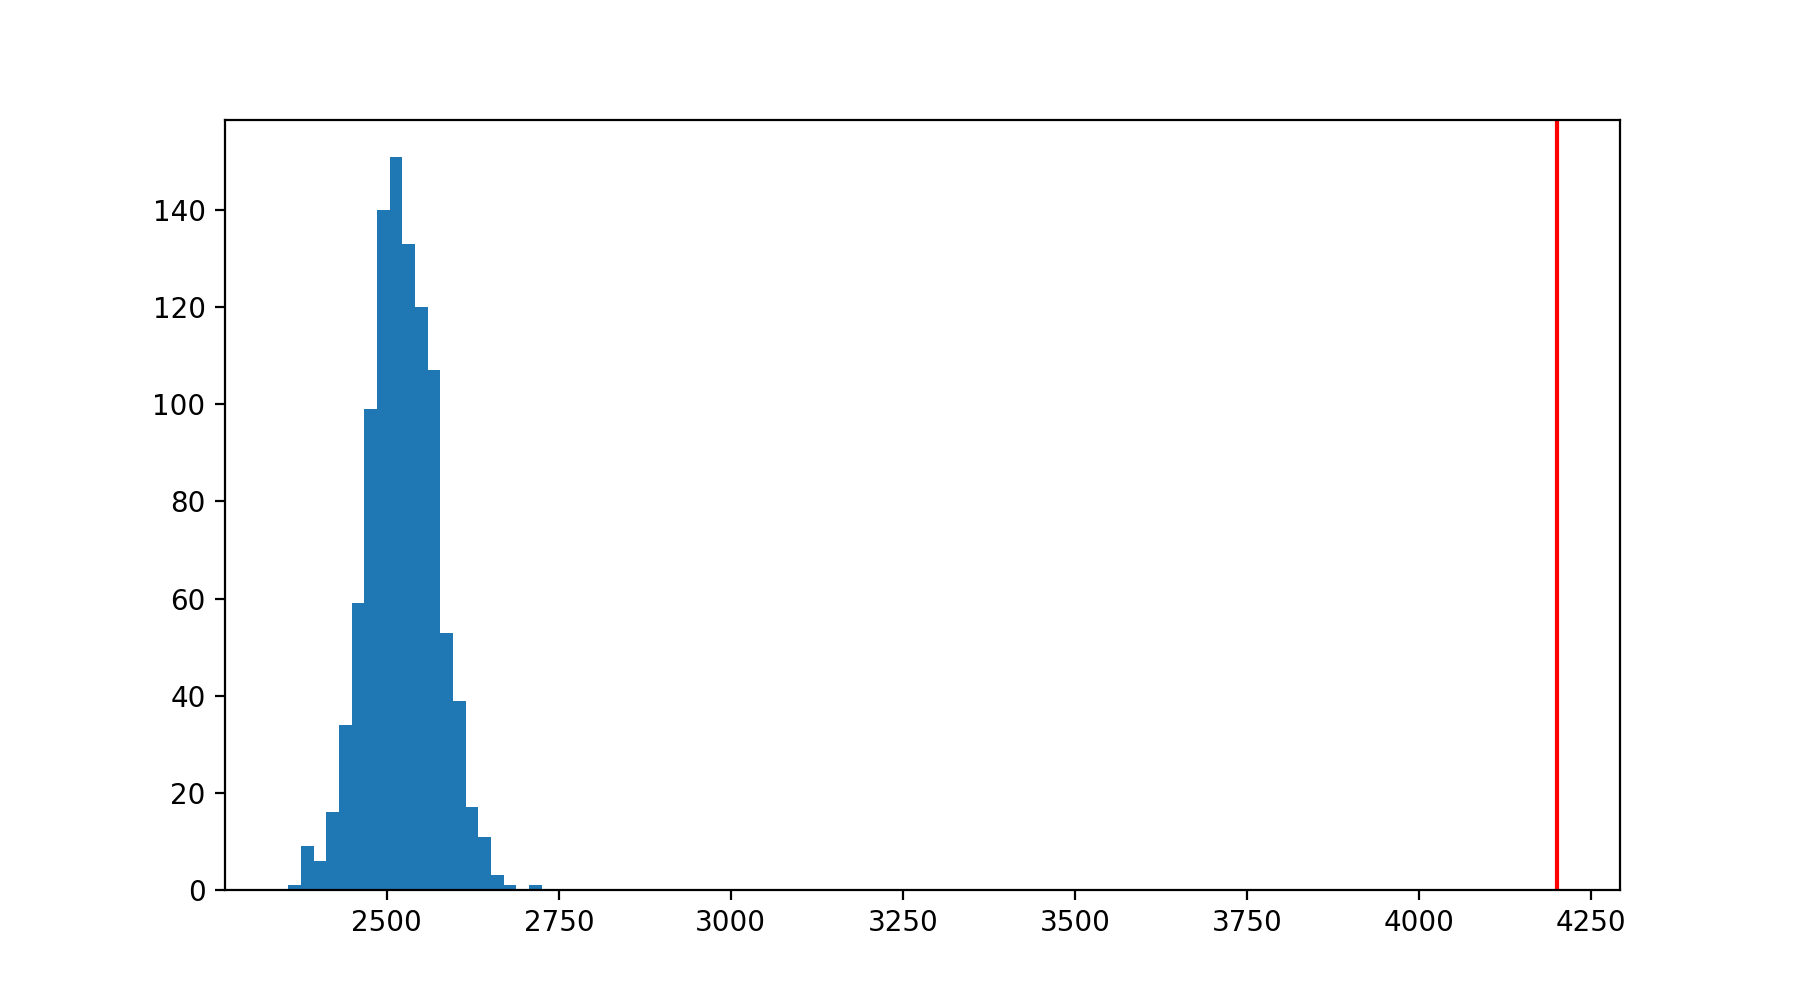

In [20]:
rate = 20
z1 = [len(PeriodicEventGenerator1(20, 10, 10+42*5, period=42, pf=0.8).times) for _x in range(1000)]
fig, ax = plt.subplots(figsize=(9,5))
ax.hist(z1, bins=20)
ax.axvline(rate*42*5, color='red')
plt.show()

In [30]:
class PeriodicEventGenerator2:
    def __init__(self, mean_rate, start_time, stop_time, period=2*np.pi, pf=1.0, phase=0.0):
        self.period = period
        self.pf = pf
        self.phase = phase
#         rate = rate*(1+pf)
        arrival_times = []
    
        _t = start_time - (1/self.sin_rate(start_time, mean_rate, pf, period, phase))*np.log(1-np.random.random())
        while _t < stop_time:
            arrival_times.append(_t)
            _t -= (1/self.sin_rate(_t, mean_rate, pf, period, phase))*np.log(1-np.random.random())
        self.times = np.array(arrival_times)
        
    def sin_rate(self, x, mean_rate, pf, period=2*np.pi, phase=0.0):
        return mean_rate*(1+pf*np.sin(x*2*np.pi/period+phase*2*np.pi))

In [31]:
period = 42
events = PeriodicEventGenerator2(20, 10, 10+10*period, period=period, pf=0.8)

<IPython.core.display.Javascript object>


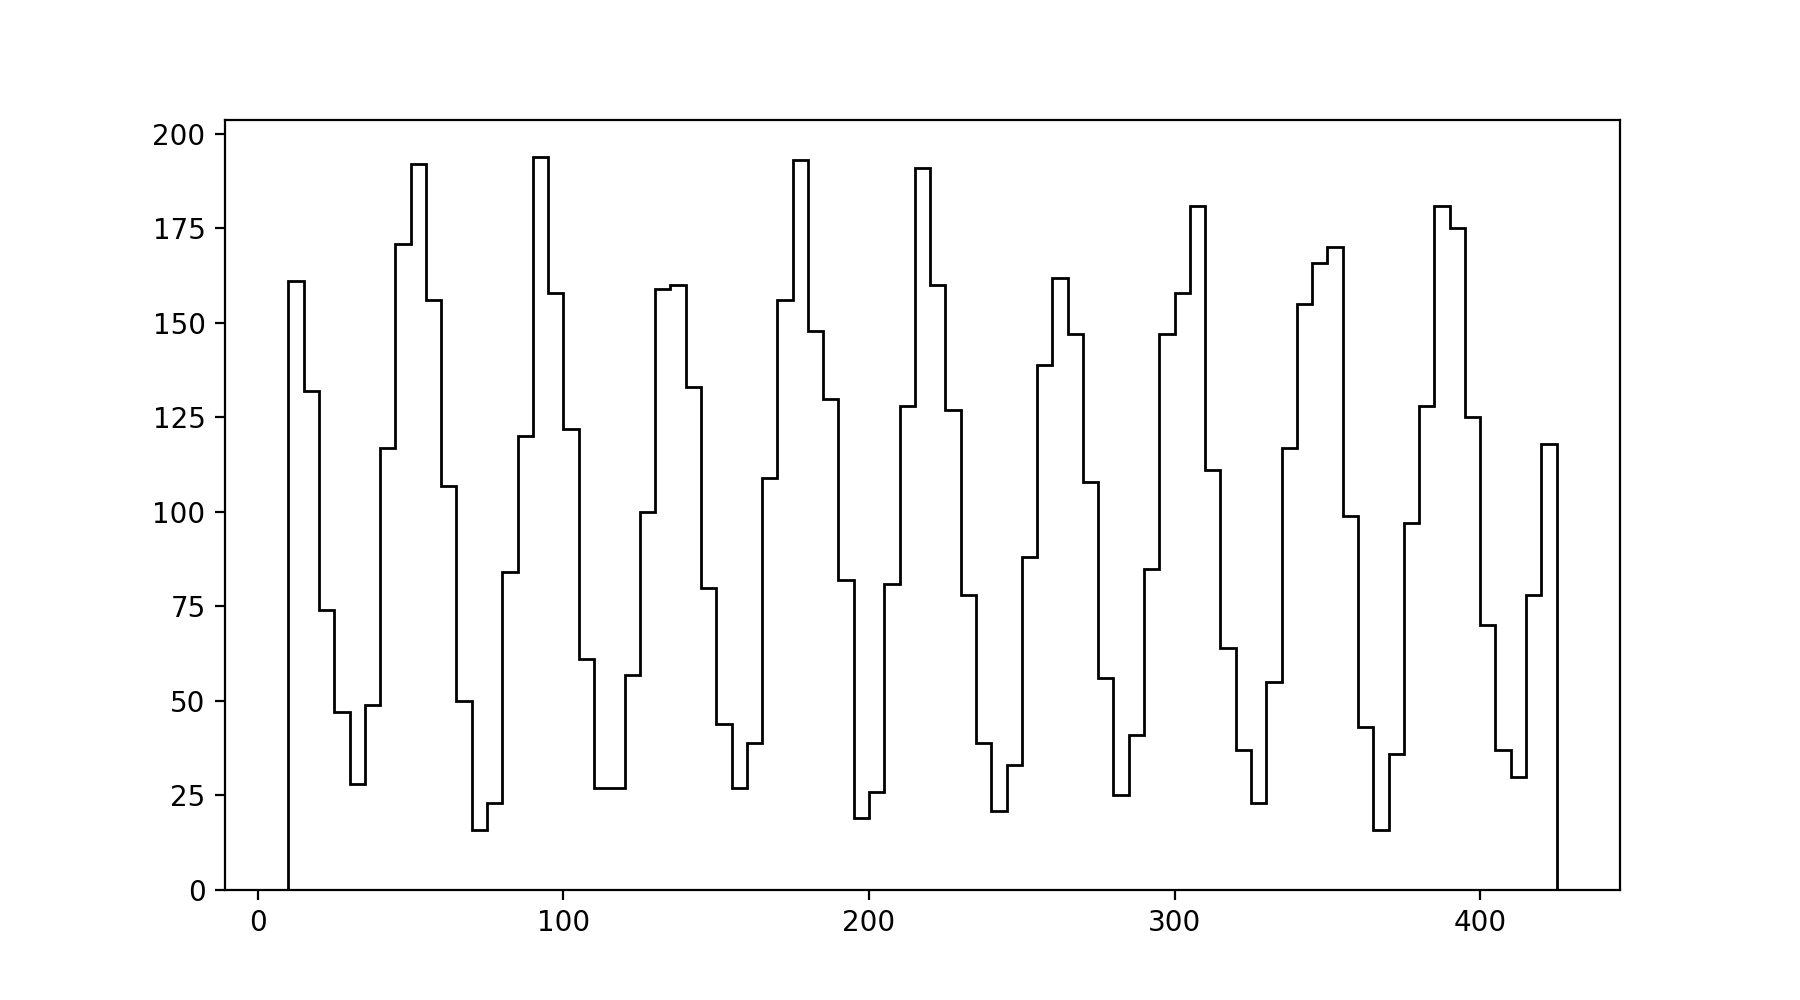

In [33]:
bins = np.arange(10, 10+10*period, 5)
fig, ax = plt.subplots(figsize=(9,5))

ax.hist(events.times, bins=bins, histtype='step' ,color='k', label='rate')

plt.show()

<IPython.core.display.Javascript object>


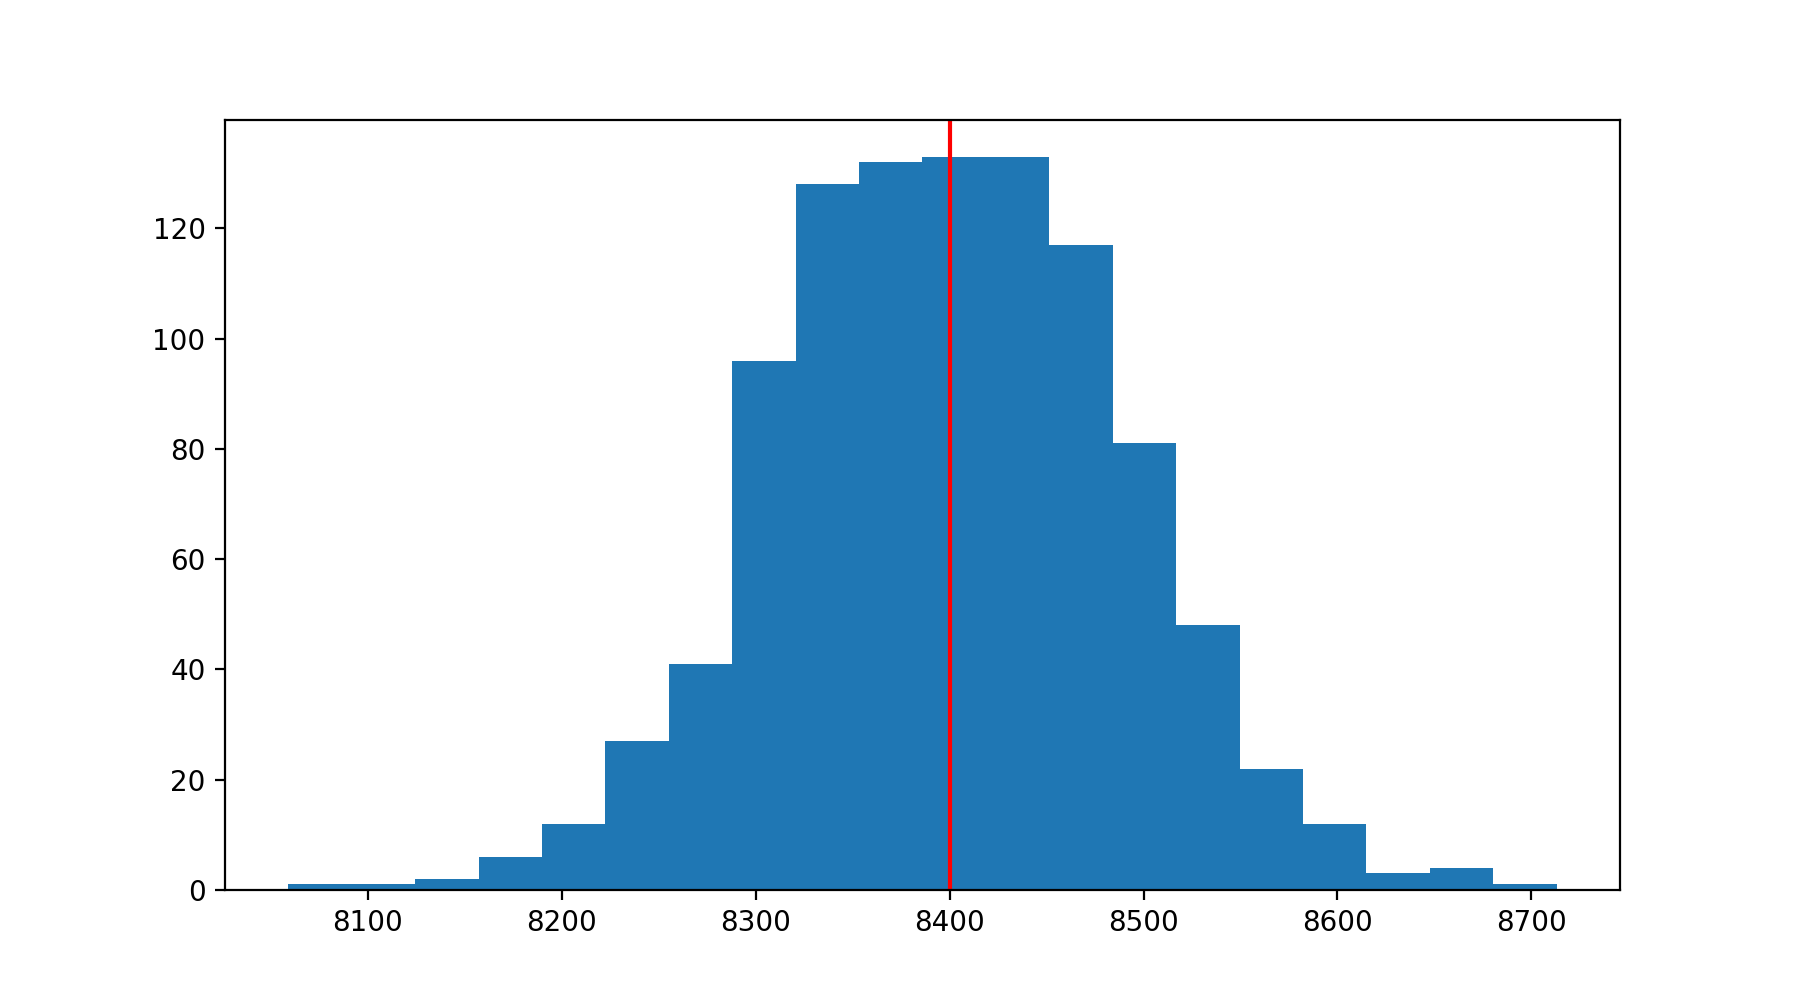

In [35]:
rate = 20
z2 = [len(PeriodicEventGenerator2(20, 10, 10+10*period, period=period, pf=0.8).times) for _x in range(1000)]
fig, ax = plt.subplots(figsize=(9,5))
ax.hist(z2, bins=20)
ax.axvline(rate*42*10, color='red')
plt.show()